In [1]:
"""
Here we train and evaluate the variations made on the liu and lam model, both for the denoising problem and for the 
deconvolution problem, and compare the results obtainded. In this notebook we use images affected by noise level 6
"""

# PACKAGES
import os

# Math and data
import math
import numpy as np
import h5py
import random
import pandas as pd
from datetime import date
#import scipy

# Image processing and plotting
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import cv2

# Astropy
from astropy.io import fits
from astropy.visualization import astropy_mpl_style

# Machine learning
import sklearn as sk

# Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Add
from tensorflow.python.framework import ops
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.models import Model

# Local functions
from TFMPackage import architectures_V2
from TFMPackage import train_utils
from TFMPackage import plot_utils
from astropy.visualization import astropy_mpl_style
from sklearn.model_selection import train_test_split

# Denoising

In [2]:
# NOISE LEVEL SELECTION
noise_level = "6"

In [3]:
# DATA LOADING
current_dir=os.getcwd()
hdul_X = fits.open(current_dir + "\\data\\final\\multi_PSF_Noise_L" + noise_level + ".fits")
hdul_Y = fits.open(current_dir + "\\data\\final\\multi_PSF_noNoise.fits")

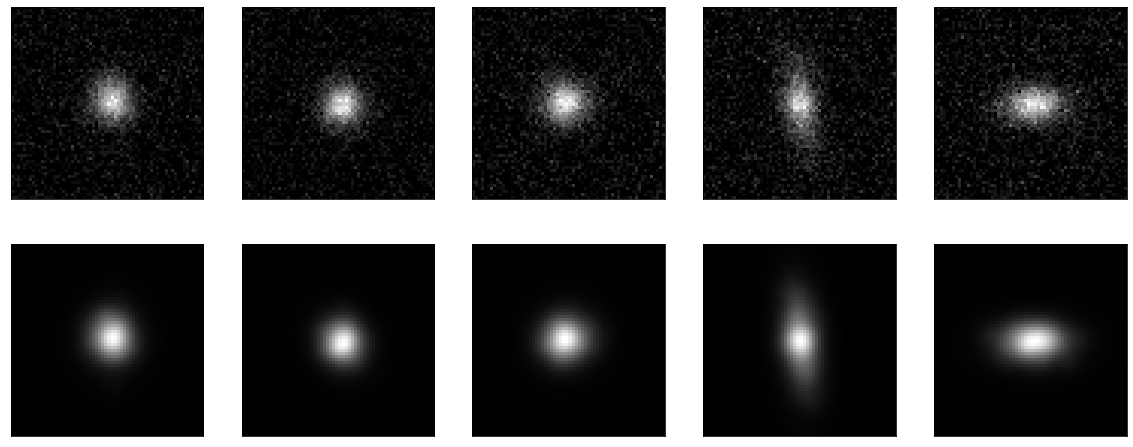

In [4]:
# DATA PREPROCESSING

# Convert to Array and remove the last row and column of the image
X = np.array([hdul_X[i].data[0:-1, 0:-1].clip(0.) for i in range(len(hdul_X))]) 
y = np.array([hdul_Y[i].data[0:-1, 0:-1] for i in range(len(hdul_Y))])

# Normalization
maxim = np.max([X,y])
X = train_utils.preprocess(X, dim=1, max_value = maxim)
y = train_utils.preprocess(y, dim=1, max_value = maxim)

# Split in 70% training 20% validation and 10% test
X_pretrain, X_test, y_pretrain, y_test = train_test_split(X, y, test_size=0.10)
X_train, X_val, y_train, y_val = train_test_split(X_pretrain, y_pretrain, test_size=0.22)

# Model input shape
input_shape = (64, 64, 1)

# Some examples of training samples with and without noise
plot_utils.display(X_train, y_train, n = 5)

In [5]:
# TRAINNING

batch_size = 128
optimizer = "rmsprop"
loss = "mse"
epochs = 40
save_dir = train_utils.create_directory(problem_type = "poisson", noise_level = "level_" + noise_level)


model_save_path_original = save_dir + "\\model_original.h5"
history_save_path_original = save_dir + "\\history_original.npy"
model_original = architectures_V2.Liu_Lam_Original(input_shape).getModel()
[model_original_trained, history_original] = train_utils.train_model(model_original, X_train, y_train, X_val, y_val, 
                                                                     model_save_path_original, history_save_path_original,
                                                                     input_shape = (64, 64, 1), optimizer=optimizer,
                                                                     epochs = epochs, batch_size = batch_size, loss=loss)



model_save_path_V11 = save_dir + "\\model_V11.h5"
history_save_path_V11 = save_dir + "\\history_V11.npy"
model_V11 = architectures_V2.Liu_Lam_V11(input_shape).getModel()
[model_V11_trained, history_V11] = train_utils.train_model(model_V11, X_train, y_train, X_val, y_val, 
                                                                     model_save_path_V11, history_save_path_V11,
                                                                     input_shape = (64, 64, 1), optimizer=optimizer,
                                                                     epochs = epochs, batch_size = batch_size, loss=loss)

model_save_path_V12 = save_dir + "\\model_V12.h5"
history_save_path_V12 = save_dir + "\\history_V12.npy"
model_V12 = architectures_V2.Liu_Lam_V12(input_shape).getModel()
[model_V12_trained, history_V12] = train_utils.train_model(model_V12, X_train, y_train, X_val, y_val, 
                                                                     model_save_path_V12, history_save_path_V12,
                                                                     input_shape = (64, 64, 1), optimizer=optimizer,
                                                                     epochs = epochs, batch_size = batch_size, loss=loss)

model_save_path_V20 = save_dir + "\\model_V20.h5"
history_save_path_V20 = save_dir + "\\history_V20.npy"
model_V20 = architectures_V2.Liu_Lam_V20(input_shape).getModel()
[model_V20_trained, history_V20] = train_utils.train_model(model_V20, X_train, y_train, X_val, y_val, 
                                                                     model_save_path_V20, history_save_path_V20,
                                                                     input_shape = (64, 64, 1), optimizer=optimizer,
                                                                     epochs = epochs, batch_size = batch_size, loss=loss)

model_save_path_V21 = save_dir + "\\model_V21.h5"
history_save_path_V21 = save_dir + "\\history_V21.npy"
model_V21 = architectures_V2.Liu_Lam_V21(input_shape).getModel()
[model_V21_trained, history_V21] = train_utils.train_model(model_V21, X_train, y_train, X_val, y_val, 
                                                                     model_save_path_V21, history_save_path_V21,
                                                                     input_shape = (64, 64, 1), optimizer=optimizer,
                                                                     epochs = epochs, batch_size = batch_size, loss=loss)

model_save_path_V303 = save_dir + "\\model_V303.h5"
history_save_path_V303 = save_dir + "\\history_V303.npy"
model_V303 = architectures_V2.Liu_Lam_V30(input_shape, f_size = 3).getModel()
[model_V303_trained, history_V303] = train_utils.train_model(model_V303, X_train, y_train, X_val, y_val, 
                                                                     model_save_path_V303, history_save_path_V303,
                                                                     input_shape = (64, 64, 1), optimizer=optimizer,
                                                                     epochs = epochs, batch_size = batch_size, loss=loss)
model_save_path_V305 = save_dir + "\\model_V305.h5"
history_save_path_V305 = save_dir + "\\history_V305.npy"
model_V305 = architectures_V2.Liu_Lam_V30(input_shape, f_size = 5).getModel()
[model_V305_trained, history_V305] = train_utils.train_model(model_V305, X_train, y_train, X_val, y_val, 
                                                                     model_save_path_V305, history_save_path_V305,
                                                                     input_shape = (64, 64, 1), optimizer=optimizer,
                                                                     epochs = epochs, batch_size = batch_size, loss=loss)

model_save_path_V307 = save_dir + "\\model_V307.h5"
history_save_path_V307 = save_dir + "\\history_V307.npy"
model_V307 = architectures_V2.Liu_Lam_V30(input_shape, f_size = 7).getModel()
[model_V307_trained, history_V307] = train_utils.train_model(model_V307, X_train, y_train, X_val, y_val, 
                                                                     model_save_path_V307, history_save_path_V307,
                                                                     input_shape = (64, 64, 1), optimizer=optimizer,
                                                                     epochs = epochs, batch_size = batch_size, loss=loss)

model_save_path_V309 = save_dir + "\\model_V309.h5"
history_save_path_V309 = save_dir + "\\history_V309.npy"
model_V309 = architectures_V2.Liu_Lam_V30(input_shape, f_size = 9).getModel()
[model_V309_trained, history_V309] = train_utils.train_model(model_V309, X_train, y_train, X_val, y_val, 
                                                                     model_save_path_V309, history_save_path_V309,
                                                                     input_shape = (64, 64, 1), optimizer=optimizer,
                                                                     epochs = epochs, batch_size = batch_size, loss=loss)


model_save_path_V41 = save_dir + "\\model_V41.h5"
history_save_path_V41 = save_dir + "\\history_V41.npy"
model_V41 = architectures_V2.Liu_Lam_V41(input_shape).getModel()
[model_V41_trained, history_V41] = train_utils.train_model(model_V41, X_train, y_train, X_val, y_val, 
                                                           model_save_path_V41, history_save_path_V41,
                                                           input_shape = (64, 64, 1), optimizer=optimizer,
                                                           epochs = epochs, batch_size = batch_size, loss=loss)


Epoch 1/40
45/45 [==============================] - 28s 607ms/step - loss: 6.6607e-04 - val_loss: 1.5395e-04
Epoch 2/40
45/45 [==============================] - 27s 603ms/step - loss: 1.5602e-04 - val_loss: 1.5116e-04
Epoch 3/40
45/45 [==============================] - 27s 597ms/step - loss: 1.2325e-04 - val_loss: 1.1427e-04
Epoch 4/40
45/45 [==============================] - 27s 591ms/step - loss: 1.0562e-04 - val_loss: 9.7255e-05
Epoch 5/40
45/45 [==============================] - 27s 590ms/step - loss: 9.3925e-05 - val_loss: 8.7156e-05
Epoch 6/40
45/45 [==============================] - 27s 596ms/step - loss: 8.7597e-05 - val_loss: 8.2890e-05
Epoch 7/40
45/45 [==============================] - 27s 607ms/step - loss: 8.1363e-05 - val_loss: 7.1863e-05
Epoch 8/40
45/45 [==============================] - 28s 617ms/step - loss: 7.6826e-05 - val_loss: 7.0285e-05
Epoch 9/40
45/45 [==============================] - 28s 614ms/step - loss: 7.2368e-05 - val_loss: 6.9453e-05
Epoch 10/40
45/45 [

Epoch 30/40
45/45 [==============================] - 33s 745ms/step - loss: 3.9564e-05 - val_loss: 3.8082e-05
Epoch 31/40
45/45 [==============================] - 34s 747ms/step - loss: 3.9055e-05 - val_loss: 3.8331e-05
Epoch 32/40
45/45 [==============================] - 34s 746ms/step - loss: 3.7990e-05 - val_loss: 4.0304e-05
Epoch 33/40
45/45 [==============================] - 32s 706ms/step - loss: 3.8025e-05 - val_loss: 3.5693e-05
Epoch 34/40
45/45 [==============================] - 31s 683ms/step - loss: 3.7224e-05 - val_loss: 4.0410e-05
Epoch 35/40
45/45 [==============================] - 32s 723ms/step - loss: 3.6883e-05 - val_loss: 3.8877e-05
Epoch 36/40
45/45 [==============================] - 33s 725ms/step - loss: 3.6481e-05 - val_loss: 3.3950e-05
Epoch 37/40
45/45 [==============================] - 32s 723ms/step - loss: 3.6086e-05 - val_loss: 4.0017e-05
Epoch 38/40
45/45 [==============================] - 32s 721ms/step - loss: 3.5824e-05 - val_loss: 3.3139e-05
Epoch 39/4

Epoch 26/40
45/45 [==============================] - 24s 528ms/step - loss: 5.6151e-05 - val_loss: 5.9835e-05
Epoch 27/40
45/45 [==============================] - 24s 530ms/step - loss: 5.5148e-05 - val_loss: 6.2492e-05
Epoch 28/40
45/45 [==============================] - 24s 534ms/step - loss: 5.4808e-05 - val_loss: 6.2465e-05
Epoch 29/40
45/45 [==============================] - 24s 527ms/step - loss: 5.3666e-05 - val_loss: 4.8487e-05
Epoch 30/40
45/45 [==============================] - 24s 532ms/step - loss: 5.3813e-05 - val_loss: 5.3488e-05
Epoch 31/40
45/45 [==============================] - 24s 531ms/step - loss: 5.2201e-05 - val_loss: 5.4900e-05
Epoch 32/40
45/45 [==============================] - 24s 533ms/step - loss: 5.2058e-05 - val_loss: 5.6709e-05
Epoch 33/40
45/45 [==============================] - 24s 534ms/step - loss: 5.1655e-05 - val_loss: 4.9263e-05
Epoch 34/40
45/45 [==============================] - 23s 510ms/step - loss: 5.0691e-05 - val_loss: 5.3827e-05
Epoch 35/4

Epoch 20/40
45/45 [==============================] - 43s 947ms/step - loss: 5.1772e-05 - val_loss: 5.0686e-05
Epoch 21/40
45/45 [==============================] - 43s 958ms/step - loss: 5.0669e-05 - val_loss: 4.8924e-05
Epoch 22/40
45/45 [==============================] - 43s 959ms/step - loss: 5.0115e-05 - val_loss: 5.0830e-05
Epoch 23/40
45/45 [==============================] - 43s 962ms/step - loss: 4.9485e-05 - val_loss: 4.5966e-05
Epoch 24/40
45/45 [==============================] - 43s 954ms/step - loss: 4.7655e-05 - val_loss: 5.2113e-05
Epoch 25/40
45/45 [==============================] - 43s 962ms/step - loss: 4.7683e-05 - val_loss: 4.4314e-05
Epoch 26/40
45/45 [==============================] - 43s 959ms/step - loss: 4.6874e-05 - val_loss: 4.2788e-05
Epoch 27/40
45/45 [==============================] - 43s 958ms/step - loss: 4.6143e-05 - val_loss: 4.5226e-05
Epoch 28/40
45/45 [==============================] - 43s 960ms/step - loss: 4.5056e-05 - val_loss: 4.9356e-05
Epoch 29/4

In [6]:
# TEST
condition = False
print('\n---------------------------------------------LIU LAM ORIGINAL-------------------------------------------------\n')
train_utils.test_model(model_original, X_test, y_test, n = 5, plot_examples = condition)
print('\n---------------------------------------LIU LAM V11 (DEPTH)----------------------------------------------\n')
train_utils.test_model(model_V11, X_test, y_test, n = 5, plot_examples = condition)
print('\n---------------------------------------LIU LAM V12 (DEPTH)----------------------------------------------\n')
train_utils.test_model(model_V12, X_test, y_test, n = 5, plot_examples = condition)
print('\n---------------------------------------LIU LAM V20 (WIDHT)-------------------------------------------------\n')
train_utils.test_model(model_V20, X_test, y_test, n = 5, plot_examples = condition)
print('\n---------------------------------------LIU LAM V21 (WIDTH)-------------------------------------------------\n')
train_utils.test_model(model_V21, X_test, y_test, n = 5, plot_examples = condition)
print('\n---------------------------------------LIU LAM V303 (KERNEL)--------------------------------------------------\n')
train_utils.test_model(model_V303, X_test, y_test, n = 5, plot_examples = condition)
print('\n---------------------------------------LIU LAM V305 (KERNEL)--------------------------------------------------\n')
train_utils.test_model(model_V305, X_test, y_test, n = 5, plot_examples = condition)
print('\n---------------------------------------LIU LAM V307 (KERNEL)--------------------------------------------------\n')
train_utils.test_model(model_V307, X_test, y_test, n = 5, plot_examples = condition)
print('\n---------------------------------------LIU LAM V309 (KERNEL)--------------------------------------------------\n')
train_utils.test_model(model_V309, X_test, y_test, n = 5, plot_examples = condition)
print('\n---------------------------------------LIU LAM V41 (3 BRANCHES)--------------------------------------------------\n')
train_utils.test_model(model_V41, X_test, y_test, n = 5, plot_examples = condition)


---------------------------------------------LIU LAM ORIGINAL-------------------------------------------------


Average MSE between reference and with aberrations images:  8765909.960668946

Average MSE between reference and corrected images:  165703.33187843606

Average PSNR between reference and with aberrations images:  26.90149602059634

Average PSNR between reference and corrected images:  44.13615366450504

Average SSIM between reference and with aberrations images:  0.20889427751790537

Average SSIM between reference and corrected images:  0.931446144836058

---------------------------------------LIU LAM V11 (DEPTH)----------------------------------------------


Average MSE between reference and with aberrations images:  8765909.960668946

Average MSE between reference and corrected images:  179659.28466917438

Average PSNR between reference and with aberrations images:  26.90149602059634

Average PSNR between reference and corrected images:  43.78496941367543

Average SSIM b

# Deconvolution

In [7]:
# NOISE LEVEL SELECTION
noise_level = "6"

In [8]:
# DATA LOADING
current_dir=os.getcwd()
hdul_X = fits.open(current_dir + "\\data\\final\\multi_PSF_Noise_L" + noise_level + ".fits")
hdul_Y = fits.open(current_dir + "\\data\\final\\multi_noPSF_noNoise.fits")

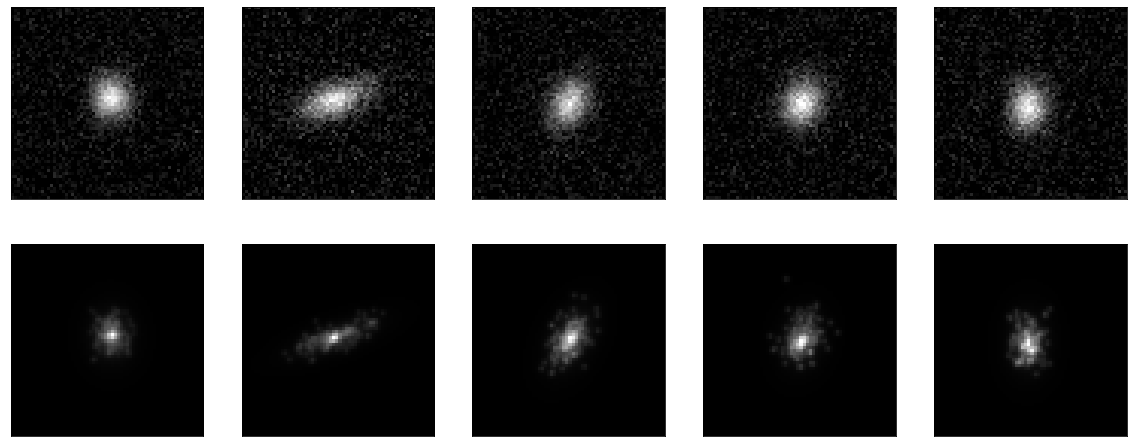

In [9]:
# DATA PREPROCESSING

# Convert to Array and remove the last row and column of the image
X = np.array([hdul_X[i].data[0:-1, 0:-1].clip(0.) for i in range(len(hdul_X))]) 
y = np.array([hdul_Y[i].data[0:-1, 0:-1] for i in range(len(hdul_Y))])

# Normalization
maxim = np.max([X,y])
X = train_utils.preprocess(X, dim=1, max_value = maxim)
y = train_utils.preprocess(y, dim=1, max_value = maxim)

# Split in 70% training 20% validation and 10% test
X_pretrain, X_test, y_pretrain, y_test = train_test_split(X, y, test_size=0.10)
X_train, X_val, y_train, y_val = train_test_split(X_pretrain, y_pretrain, test_size=0.22)

# Model input shape
input_shape = (64, 64, 1)

# Some examples of training samples with and without noise
plot_utils.display(X_train, y_train, n = 5)

In [10]:
# TRAINNING

batch_size = 128
optimizer = "rmsprop"
loss = "mse"
epochs = 40
save_dir = train_utils.create_directory(problem_type = "PSF", noise_level = "level_" + noise_level)


model_save_path_original = save_dir + "\\model_original.h5"
history_save_path_original = save_dir + "\\history_original.npy"
model_original = architectures_V2.Liu_Lam_Original(input_shape).getModel()
[model_original_trained, history_original] = train_utils.train_model(model_original, X_train, y_train, X_val, y_val, 
                                                                     model_save_path_original, history_save_path_original,
                                                                     input_shape = (64, 64, 1), optimizer=optimizer,
                                                                     epochs = epochs, batch_size = batch_size, loss=loss)

model_save_path_V11 = save_dir + "\\model_V11.h5"
history_save_path_V11 = save_dir + "\\history_V11.npy"
model_V11 = architectures_V2.Liu_Lam_V11(input_shape).getModel()
[model_V11_trained, history_V11] = train_utils.train_model(model_V11, X_train, y_train, X_val, y_val, 
                                                                     model_save_path_V11, history_save_path_V11,
                                                                     input_shape = (64, 64, 1), optimizer=optimizer,
                                                                     epochs = epochs, batch_size = batch_size, loss=loss)

model_save_path_V12 = save_dir + "\\model_V12.h5"
history_save_path_V12 = save_dir + "\\history_V12.npy"
model_V12 = architectures_V2.Liu_Lam_V12(input_shape).getModel()
[model_V12_trained, history_V12] = train_utils.train_model(model_V12, X_train, y_train, X_val, y_val, 
                                                                     model_save_path_V12, history_save_path_V12,
                                                                     input_shape = (64, 64, 1), optimizer=optimizer,
                                                                     epochs = epochs, batch_size = batch_size, loss=loss)

model_save_path_V20 = save_dir + "\\model_V20.h5"
history_save_path_V20 = save_dir + "\\history_V20.npy"
model_V20 = architectures_V2.Liu_Lam_V20(input_shape).getModel()
[model_V20_trained, history_V20] = train_utils.train_model(model_V20, X_train, y_train, X_val, y_val, 
                                                                     model_save_path_V20, history_save_path_V20,
                                                                     input_shape = (64, 64, 1), optimizer=optimizer,
                                                                     epochs = epochs, batch_size = batch_size, loss=loss)

model_save_path_V21 = save_dir + "\\model_V21.h5"
history_save_path_V21 = save_dir + "\\history_V21.npy"
model_V21 = architectures_V2.Liu_Lam_V21(input_shape).getModel()
[model_V21_trained, history_V21] = train_utils.train_model(model_V21, X_train, y_train, X_val, y_val, 
                                                                     model_save_path_V21, history_save_path_V21,
                                                                     input_shape = (64, 64, 1), optimizer=optimizer,
                                                                     epochs = epochs, batch_size = batch_size, loss=loss)

model_save_path_V303 = save_dir + "\\model_V303.h5"
history_save_path_V303 = save_dir + "\\history_V303.npy"
model_V303 = architectures_V2.Liu_Lam_V30(input_shape, f_size = 3).getModel()
[model_V303_trained, history_V303] = train_utils.train_model(model_V303, X_train, y_train, X_val, y_val, 
                                                                     model_save_path_V303, history_save_path_V303,
                                                                     input_shape = (64, 64, 1), optimizer=optimizer,
                                                                     epochs = epochs, batch_size = batch_size, loss=loss)
model_save_path_V305 = save_dir + "\\model_V305.h5"
history_save_path_V305 = save_dir + "\\history_V305.npy"
model_V305 = architectures_V2.Liu_Lam_V30(input_shape, f_size = 5).getModel()
[model_V305_trained, history_V305] = train_utils.train_model(model_V305, X_train, y_train, X_val, y_val, 
                                                                     model_save_path_V305, history_save_path_V305,
                                                                     input_shape = (64, 64, 1), optimizer=optimizer,
                                                                     epochs = epochs, batch_size = batch_size, loss=loss)

model_save_path_V307 = save_dir + "\\model_V307.h5"
history_save_path_V307 = save_dir + "\\history_V307.npy"
model_V307 = architectures_V2.Liu_Lam_V30(input_shape, f_size = 7).getModel()
[model_V307_trained, history_V307] = train_utils.train_model(model_V307, X_train, y_train, X_val, y_val, 
                                                                     model_save_path_V307, history_save_path_V307,
                                                                     input_shape = (64, 64, 1), optimizer=optimizer,
                                                                     epochs = epochs, batch_size = batch_size, loss=loss)

model_save_path_V309 = save_dir + "\\model_V309.h5"
history_save_path_V309 = save_dir + "\\history_V309.npy"
model_V309 = architectures_V2.Liu_Lam_V30(input_shape, f_size = 9).getModel()
[model_V309_trained, history_V309] = train_utils.train_model(model_V309, X_train, y_train, X_val, y_val, 
                                                                     model_save_path_V309, history_save_path_V309,
                                                                     input_shape = (64, 64, 1), optimizer=optimizer,
                                                                     epochs = epochs, batch_size = batch_size, loss=loss)

model_save_path_V41 = save_dir + "\\model_V41.h5"
history_save_path_V41 = save_dir + "\\history_V41.npy"
model_V41 = architectures_V2.Liu_Lam_V41(input_shape).getModel()
[model_V41_trained, history_V41] = train_utils.train_model(model_V41, X_train, y_train, X_val, y_val, 
                                                           model_save_path_V41, history_save_path_V41,
                                                           input_shape = (64, 64, 1), optimizer=optimizer,
                                                           epochs = epochs, batch_size = batch_size, loss=loss)


Epoch 1/40
45/45 [==============================] - 35s 745ms/step - loss: 4.3543e-04 - val_loss: 2.8948e-04
Epoch 2/40
45/45 [==============================] - 33s 732ms/step - loss: 2.4133e-04 - val_loss: 2.0775e-04
Epoch 3/40
45/45 [==============================] - 33s 729ms/step - loss: 1.9514e-04 - val_loss: 2.1967e-04
Epoch 4/40
45/45 [==============================] - 33s 731ms/step - loss: 1.7756e-04 - val_loss: 1.6887e-04
Epoch 5/40
45/45 [==============================] - 33s 741ms/step - loss: 1.6584e-04 - val_loss: 1.7621e-04
Epoch 6/40
45/45 [==============================] - 33s 734ms/step - loss: 1.5662e-04 - val_loss: 1.5359e-04
Epoch 7/40
45/45 [==============================] - 31s 687ms/step - loss: 1.4992e-04 - val_loss: 1.5184e-04
Epoch 8/40
45/45 [==============================] - 29s 641ms/step - loss: 1.4459e-04 - val_loss: 1.4005e-04
Epoch 9/40
45/45 [==============================] - 28s 629ms/step - loss: 1.3983e-04 - val_loss: 1.5274e-04
Epoch 10/40
45/45 [

Epoch 30/40
45/45 [==============================] - 34s 756ms/step - loss: 1.0761e-04 - val_loss: 1.0858e-04
Epoch 31/40
45/45 [==============================] - 34s 757ms/step - loss: 1.0712e-04 - val_loss: 1.0797e-04
Epoch 32/40
45/45 [==============================] - 34s 758ms/step - loss: 1.0749e-04 - val_loss: 1.0693e-04
Epoch 33/40
45/45 [==============================] - 34s 762ms/step - loss: 1.0677e-04 - val_loss: 1.0653e-04
Epoch 34/40
45/45 [==============================] - 34s 755ms/step - loss: 1.0672e-04 - val_loss: 1.0780e-04
Epoch 35/40
45/45 [==============================] - 34s 758ms/step - loss: 1.0631e-04 - val_loss: 1.0703e-04
Epoch 36/40
45/45 [==============================] - 34s 754ms/step - loss: 1.0552e-04 - val_loss: 1.1122e-04
Epoch 37/40
45/45 [==============================] - 34s 758ms/step - loss: 1.0591e-04 - val_loss: 1.0496e-04
Epoch 38/40
45/45 [==============================] - 34s 757ms/step - loss: 1.0546e-04 - val_loss: 1.0468e-04
Epoch 39/4

Epoch 26/40
45/45 [==============================] - 23s 511ms/step - loss: 1.2377e-04 - val_loss: 1.2354e-04
Epoch 27/40
45/45 [==============================] - 23s 510ms/step - loss: 1.2296e-04 - val_loss: 1.2689e-04
Epoch 28/40
45/45 [==============================] - 24s 529ms/step - loss: 1.2253e-04 - val_loss: 1.2639e-04
Epoch 29/40
45/45 [==============================] - 24s 534ms/step - loss: 1.2199e-04 - val_loss: 1.2028e-04
Epoch 30/40
45/45 [==============================] - 24s 538ms/step - loss: 1.2120e-04 - val_loss: 1.2239e-04
Epoch 31/40
45/45 [==============================] - 24s 536ms/step - loss: 1.2083e-04 - val_loss: 1.2241e-04
Epoch 32/40
45/45 [==============================] - 24s 534ms/step - loss: 1.2035e-04 - val_loss: 1.2037e-04
Epoch 33/40
45/45 [==============================] - 24s 536ms/step - loss: 1.1961e-04 - val_loss: 1.1954e-04
Epoch 34/40
45/45 [==============================] - 24s 538ms/step - loss: 1.1925e-04 - val_loss: 1.1979e-04
Epoch 35/4

45/45 [==============================] - 42s 934ms/step - loss: 1.1942e-04 - val_loss: 1.1892e-04
Epoch 18/40
45/45 [==============================] - 42s 937ms/step - loss: 1.1798e-04 - val_loss: 1.1745e-04
Epoch 19/40
45/45 [==============================] - 42s 926ms/step - loss: 1.1696e-04 - val_loss: 1.1695e-04
Epoch 20/40
45/45 [==============================] - 42s 930ms/step - loss: 1.1598e-04 - val_loss: 1.1694e-04
Epoch 21/40
45/45 [==============================] - 42s 936ms/step - loss: 1.1534e-04 - val_loss: 1.1574e-04
Epoch 22/40
45/45 [==============================] - 41s 921ms/step - loss: 1.1443e-04 - val_loss: 1.2230e-04
Epoch 23/40
45/45 [==============================] - 42s 925ms/step - loss: 1.1422e-04 - val_loss: 1.1375e-04
Epoch 24/40
45/45 [==============================] - 43s 967ms/step - loss: 1.1348e-04 - val_loss: 1.1571e-04
Epoch 25/40
45/45 [==============================] - 43s 963ms/step - loss: 1.1292e-04 - val_loss: 1.1331e-04
Epoch 26/40
45/45 [===

In [11]:
# TEST
condition = False
print('\n---------------------------------------------LIU LAM ORIGINAL-------------------------------------------------\n')
train_utils.test_model(model_original, X_test, y_test, n = 5, plot_examples = condition)
print('\n---------------------------------------LIU LAM V11 (DEPTH)----------------------------------------------\n')
train_utils.test_model(model_V11, X_test, y_test, n = 5, plot_examples = condition)
print('\n---------------------------------------LIU LAM V12 (DEPTH)----------------------------------------------\n')
train_utils.test_model(model_V12, X_test, y_test, n = 5, plot_examples = condition)
print('\n---------------------------------------LIU LAM V20 (WIDHT)-------------------------------------------------\n')
train_utils.test_model(model_V20, X_test, y_test, n = 5, plot_examples = condition)
print('\n---------------------------------------LIU LAM V21 (WIDTH)-------------------------------------------------\n')
train_utils.test_model(model_V21, X_test, y_test, n = 5, plot_examples = condition)
print('\n---------------------------------------LIU LAM V303 (KERNEL)--------------------------------------------------\n')
train_utils.test_model(model_V303, X_test, y_test, n = 5, plot_examples = condition)
print('\n---------------------------------------LIU LAM V305 (KERNEL)--------------------------------------------------\n')
train_utils.test_model(model_V305, X_test, y_test, n = 5, plot_examples = condition)
print('\n---------------------------------------LIU LAM V307 (KERNEL)--------------------------------------------------\n')
train_utils.test_model(model_V307, X_test, y_test, n = 5, plot_examples = condition)
print('\n---------------------------------------LIU LAM V309 (KERNEL)--------------------------------------------------\n')
train_utils.test_model(model_V309, X_test, y_test, n = 5, plot_examples = condition)
print('\n---------------------------------------LIU LAM V41 (3 BRANCHES)--------------------------------------------------\n')
train_utils.test_model(model_V41, X_test, y_test, n = 5, plot_examples = condition)


---------------------------------------------LIU LAM ORIGINAL-------------------------------------------------


Average MSE between reference and with aberrations images:  2661940.574099995

Average MSE between reference and corrected images:  463039.90678017697

Average PSNR between reference and with aberrations images:  32.077482515941455

Average PSNR between reference and corrected images:  39.673281855243026

Average SSIM between reference and with aberrations images:  0.42334607258606927

Average SSIM between reference and corrected images:  0.9532947031444836

---------------------------------------LIU LAM V11 (DEPTH)----------------------------------------------


Average MSE between reference and with aberrations images:  2661940.574099995

Average MSE between reference and corrected images:  461446.9098934221

Average PSNR between reference and with aberrations images:  32.077482515941455

Average PSNR between reference and corrected images:  39.68824865476552

Average SSI